In [1]:
%matplotlib inline

import numpy as np
import sklearn
import pandas
import matplotlib.pyplot as plt
import time
import pickle

from nnrunner import Network

In [2]:
## loading and processing the data
init_start = time.time()

train = pandas.read_csv('mnist_train.csv', header=None)
train_load = time.time()
print("Loaded mnist training data in %.4ss" % (train_load - init_start))

test = pandas.read_csv('mnist_test.csv', header=None)
test_load = time.time()
print("Loaded mnist test data in %.4ss" % (test_load - train_load))

training_data = [(train.iloc[i][1:].values/255.0, train.iloc[i][0]) for i in range(len(train))]
train_proc = time.time()
print("Processed training data in %.4ss" % (train_proc - test_load))

test_proc = time.time()
test_data = [(test.iloc[i][1:].values/255.0, test.iloc[i][0]) for i in range(len(test))]
print("Processed test data in %.4ss" % (test_proc - train_proc))


Loaded mnist training data in 5.83s
Loaded mnist test data in 1.08s
Processed training data in 17.1s
Processed test data in 0.00s


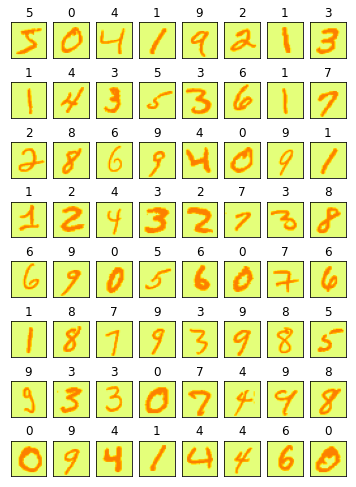

In [3]:
## some data exploration / visualization
grid_size = 8
fig, ax = plt.subplots(grid_size, grid_size)
plt.subplots_adjust(top=1.75)
for i in range(grid_size**2):
    cur_ax = ax[i//grid_size][i%grid_size]
    img = np.array(train.iloc[i][1:])
    img = np.reshape(img, (28,28))
    
    cur_ax.set_yticklabels([])
    cur_ax.set_xticklabels([])
    cur_ax.set_yticks([])
    cur_ax.set_xticks([])
    
    cur_ax.set_title(train.iloc[i][0])
    cur_ax.imshow(img, cmap='Wistia', interpolation='hanning')

Want to see how model performs with different network params

Train each network over 50 Epochs

Plots:
* Accuracy vs. msize
* Accuracy vs. eta

In [21]:
traintest_run = time.time()
net = Network(msize=0.01)
results = net.Train(training_data, test_data);
print(f"Trained and tested data in {(time.time() - traintest_run)/60.0:.2f} minutes")

Trained and tested data in 4.53 minutes


# Experiments

## 1. Training subset size
## 2. Learning rates

In [3]:
subset_size_results = []
eta_start = time.time()
for msize in [0.001, 0.01, 0.1]:
    net = Network(msize=msize)
    subset_size_results.append(net.Train(training_data, test_data)) # accuracy for each learning rate after each epoch
    
print(f"Completed subset size experiment in {(time.time() - eta_start)/60.0:.2f} minutes")

Training results written to file.
Training results written to file.
Training results written to file.
Completed subset size experiment in 21.43 minutes


In [8]:
with open("subset_size_exp_results.data", "wb") as f:
    pickle.dump(subset_size_results, f)
    
print("Subset size experiment results written to file.")

Subset size experiment results written to file.


In [13]:
subset_size_results[0][0][0]

0.07221666666666667

In [7]:
fig, ax = plt.subplots(1,1)
xaxi = list(range(net.n_epochs + 1))
ax.plot(xaxi, subset_size_results[0][0], 'b-', alpha=0.75)
ax.plot(xaxi, subset_size_results[1][1], 'r-', alpha=0.75)
ax.plot(xaxi, subset_size_results[2][2], 'g-', alpha=0.75)
ax.set(xlabel='Epoch', ylabel='Validation Set Accuracy (%)', ylim=[82,92])
ax.grid()
print("----------")
print(f"Accuracy after 50 epochs: {subset_size_results[0][-1]:.2f}%")

ValueError: x and y must have same first dimension, but have shapes (51,) and (2,)

In [3]:
learning_rate_results = []
eta_start = time.time()
for eta in [0.001, 0.01, 0.1]:
    net = Network(eta=eta)
    learning_rate_results.append(net.Train(training_data, test_data)) # accuracy for each learning rate after each epoch
    
print(f"Completed learning rate experiment in {(time.time() - eta_start)/60.0:.2f} minutes")




Completed learning rate experiment in 11.65 minutes


TypeError: an integer is required (got type _io.BufferedWriter)

In [6]:
with open("learning_rate_exp_results.data", "wb") as f:
    pickle.dump(learning_rate_results, f)
    
print("Learning rate experiment results written to file.")

Learning rate experiment results written to file.


In [8]:
with open("learning_rate_exp_results.data", "rb") as f:
    data = pickle.load(f)


----------
Accuracy after 50 epochs: 88.27%


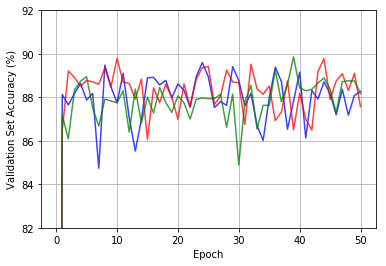

In [17]:
fig, ax = plt.subplots(1,1)
xaxi = list(range(net.n_epochs + 1))
ax.plot(xaxi, data[0], 'b-', alpha=0.75)
ax.plot(xaxi, data[1], 'r-', alpha=0.75)
ax.plot(xaxi, data[2], 'g-', alpha=0.75)
ax.set(xlabel='Epoch', ylabel='Validation Set Accuracy (%)', ylim=[82,92])
ax.grid()
print("----------")
print(f"Accuracy after 50 epochs: {data[0][-1]:.2f}%")

In [0]:
fig, ax = plt.subplots(1,1)
xaxi = list(range(len(results)))
ax.plot(xaxi, results, 'C2o-', alpha=0.75)
ax.set(xlabel='Epoch', ylabel='Accuracy (%)', ylim=[0,100])
ax.grid()
print("----------")
print(f"Accuracy after 50 epochs: {results[-1]:.2f}%")